In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = data = np.array([[3,  1.5, 1], 
                 [2,  1,   0], 
                 [4,  1.5, 1], 
                 [2.5,  1, 0],
                 [3.5,0.5, 1],
                 [2,  0.5, 0],
                 [5.5,1,   1],
                 [1,  1,   0]])

In [11]:
X = data[:, 0:2]
y = data[:,2:3]

In [4]:
def sigmoid(x, derif=False):
    if derif==True:
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

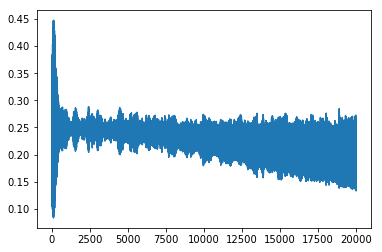

In [35]:
#Initialization changed - hegman12
W1 = np.random.random((2,3))
W2 = np.random.random((3,1))

#Bias - hegman12
bias1=-1
bias2=-1

alpha = 0.01
costs = []

#for reproducibility - hegman12
np.random.seed(10)

for i in range(20000):
    ri = np.random.randint(len(X))
    m = X[ri]

    m = m.reshape(1, len(m))
    #adding the bias term
    #m = np.column_stack([-np.ones(shape=(len(m), 1)), m])
    #I2 = m*W1

    #added bias1 - hegman12
    I2 = m.dot(W1)+bias1
    #adding the bias term
    #I2 = np.column_stack([-np.ones(shape=(len(I2), 1)), I2])
    #Y2 = sigmoid(np.sum(I2))
    Y2 = sigmoid(I2)
    #Y2 = np.column_stack([-np.ones(shape=(len(Y2), 1)), Y2])

    # I3 is your prediction
    I3 = Y2.dot(W2)+bias2
    #I3 = Y2*W2

    #Hypothesis

    #Last layer will not have activation, unless you are trying binary classification 
    # in which case squared error is not sessessary. - hegman12

    Y3 = sigmoid(I3)
    #J = (1/2)*np.square(y[ri] - Y3)

    # J is your error, specifically squared error    - hegman12
    #J = np.square(I3-y[ri])
    J = np.square(Y3-y[ri])
    costs.append(np.asscalar(J))
    #costs.append(J)

#     if i%1000==0:        
#         print("predicted",I3.flatten(),"Actual",y[ri])    
#         print("error is",J)

    #derivative of squared error wrt I3 - hegman12
    dI3 = 2*(Y3-y[ri])*J
    np.clip(dI3,-100,100,out=dI3)

    #Note dot product multiplication here - hegman12
    dw2=np.dot(Y2.T,dI3)
    dY2=np.dot(W2,dI3)
    dbias2=np.sum(bias2)

    #W2 = W2 + alpha*dw2
    # See update changed - hegman12
    W2 = W2 - alpha*dw2
    bias2=bias2-alpha*dbias2

    #Note elementwise multiplication here - hegman12
    dI2=sigmoid(I2, True) * dY2.T

    #note dot product here - hegman12
    dw1=np.dot(m.T,dI2)
    dbias1=np.sum(bias1)
    
    #dm Not nessessary, but for clarity only
    dm=np.dot(W1,dI2.T)    

    #delta2 = -1*(np.sum(delta3*W2)) * sigmoid(I2, True)
    #D2 = -1*np.sum(delta2*m)*sigmoid(I2, True)

    #W2 = W2 + alpha*D3
    #W1 = W1 - alpha*D2

    #see how update rule changed - hegman12
    W1 = W1 - alpha*dw1
    bias1=bias1-alpha*dbias1

plt.plot(costs)

In [34]:
Y2.T*dI3

array([[ 0.04693143],
       [ 0.05527459],
       [ 0.09375042]])

In [33]:
Y2.T.dot(dI3)

array([[ 0.04693143],
       [ 0.05527459],
       [ 0.09375042]])

In [17]:
m.dot(W1)+bias1

array([[ 0.30582178,  0.43235543,  2.23515017]])

-5.056988325167128e-88

In [18]:
W1

array([[ 0.54801106,  0.49863759,  1.00068222],
       [-0.24218929, -0.06628216,  1.23446795]])

In [5]:
syn0 = 2*np.random.random((3,1)) - 1
np.mean(syn0)

-0.086354956068151426

In [3]:
data = pd.read_csv('/Users/jacobcastiglioni/Desktop/machine-learning-ex2/ex2/ex2data1.txt', header=None)
data = data.as_matrix()

In [5]:
X = data[:,0:2]
y = data[:,2:3]

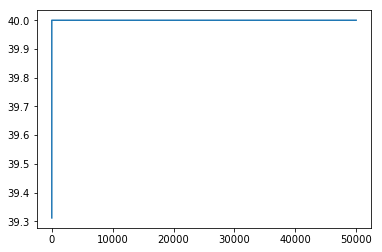

In [8]:
import numpy as np

# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# # input dataset
# X = np.array([  [0,0,1],
#                 [0,1,1],
#                 [1,0,1],
#                 [1,1,1] ])
    
# # # output dataset            
# y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((2,1)) - 1
costs = []

for iter in range(50000):

    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = abs(y - l1)
    costs.append(np.sum(l1_error))
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * sigmoid(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

plt.plot(costs)

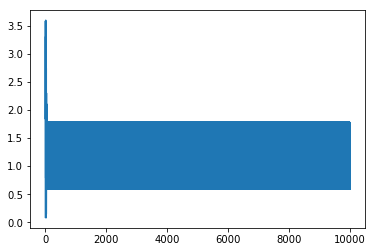

In [13]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
# X = np.array([  [0,0,1],
#                 [0,1,1],
#                 [1,0,1],
#                 [1,1,1] ])
    
# # output dataset            
# y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((2,1)) - 1
costs = []

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1
    costs.append(abs(np.sum(l1_error)))
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

plt.plot(costs)

In [9]:
syn0

array([[-0.16595599],
       [ 0.44064899]])